In [1]:
from matplotlib import pyplot as plt
plt.style.use("seaborn")

In [2]:
scores_wu=[]
all_lines=[]
frame_no=1
with open("C:/Users/vatan/Downloads/car16_with_update_scores.txt") as f:
    for line in f:
        all_lines.append(line)
        
for i in range(1992):
    frame_scores=[]
    for line in all_lines:
        splitted_line=line.split(" | ")
        if splitted_line[0]==("frame"+str(i+1)):
            frame_scores.append(float(splitted_line[2]))
    #print("frame"+str(i+1))
    if len(frame_scores)!=0:
        scores_wu.append(max(frame_scores))
    else:
        pass

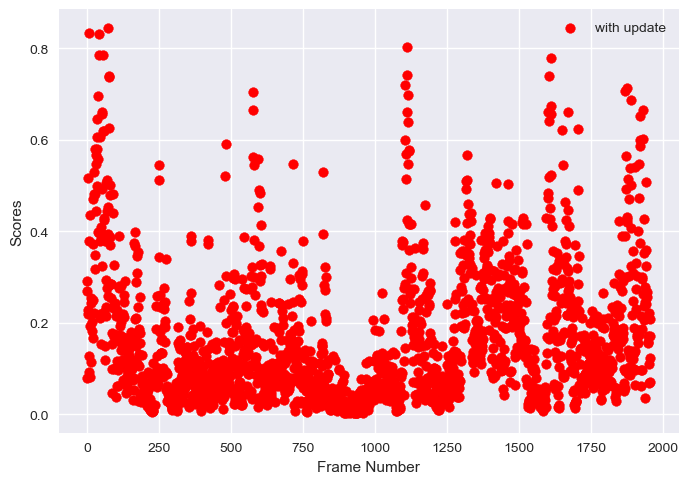

In [3]:
x=list(range(len(scores_wu)))
plt.scatter(x,scores_wu,color='r',label='with update')
#plt.plot(x,acc_ueff[0:15750],color='g',label='updated in each five frames')
plt.xlabel("Frame Number")
plt.ylabel("Scores")
plt.legend()
plt.show()

In [4]:
bb_list=[]
frame_list=[]

for i in range(1992):
    frame_by=[]
    for line in all_lines:
        splitted_line=line.split(" | ")
        if splitted_line[0]==("frame"+str(i+1)):
            frame_by.append(line)        
    frame_list.append(frame_by)
print("frame by frame list generated")
print(frame_list[0:10])
for frame in frame_list:
    if len(frame)!=0:
        bb_list.append(frame[0].split(" | ")[1])
    else:
        pass
    
print("bb list generated")
print(bb_list[0:10])
p_coordinates=[]
p_lines=[]
with open("C:/Users/vatan/Downloads/car16_bbs.txt") as f:
    for line in f:
        p_lines.append(line)

for bb in bb_list:
    bb_splitted=bb.split(".")
    bb_name=bb_splitted[0]
    bb_number=int(bb_name[2:])
    p_line=p_lines[bb_number]
    p_line_splitted=p_line.split(",")
    p_coordinates.append([int(p_line_splitted[1]),
                           int(p_line_splitted[2]),
                           int(p_line_splitted[1])+int(p_line_splitted[3]),
                           int(p_line_splitted[2])+int(p_line_splitted[4])])

print("coordinates of bbs with high scores generated")
print(p_coordinates[0:10])
gt_coordinates=[]
gt_lines=[]
with open("C:/Users/vatan/Downloads/groundtruthcar16.txt") as f:
    for line in f:
        gt_lines.append(line)

for i in range(1992):
    gt_line_splitted=gt_lines[i].split(",")
    gt_coordinates.append([int(float(gt_line_splitted[0])),
                           int(float(gt_line_splitted[1])),
                           int(float(gt_line_splitted[0]))+int(float(gt_line_splitted[2])),
                           int(float(gt_line_splitted[1]))+int(float(gt_line_splitted[3]))])
    
print("ground truth coordinates generated")
print(gt_coordinates[0:10])



frame by frame list generated
[['frame1 | bb0.jpg | 0.26872268319129944\n'], ['frame2 | bb1.jpg | 0.07917314767837524\n'], ['frame3 | bb2.jpg | 0.291812539100647\n', 'frame3 | bb3.jpg | 0.07195796072483063\n'], ['frame4 | bb4.jpg | 0.21980679035186768\n'], ['frame5 | bb5.jpg | 0.22788649797439575\n', 'frame5 | bb6.jpg | 0.1360655426979065\n'], ['frame6 | bb7.jpg | 0.5165125131607056\n', 'frame6 | bb8.jpg | 0.22115758061408997\n'], ['frame7 | bb9.jpg | 0.8343125581741333\n', 'frame7 | bb10.jpg | 0.19921469688415527\n'], ['frame8 | bb11.jpg | 0.3784954249858856\n'], ['frame9 | bb12.jpg | 0.1273312270641327\n'], ['frame10 | bb13.jpg | 0.09301169216632843\n']]
bb list generated
['bb0.jpg', 'bb1.jpg', 'bb2.jpg', 'bb4.jpg', 'bb5.jpg', 'bb7.jpg', 'bb9.jpg', 'bb11.jpg', 'bb12.jpg', 'bb13.jpg']
coordinates of bbs with high scores generated
[[555, 252, 577, 269], [555, 253, 577, 268], [555, 253, 578, 269], [555, 252, 577, 268], [555, 252, 578, 268], [556, 253, 579, 268], [555, 252, 579, 268], [5

In [5]:
def IoU(boxA, boxB):
	    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
            # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
            # compute the area of both the prediction and ground-truth
            # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
            # compute the intersection over union by taking the intersection
            # area and dividing it by the sum of prediction + ground-truth
            # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
            # return the intersection over union value
    return iou

In [6]:
iou_list=[]
for pico,gtco in zip(p_coordinates,gt_coordinates):
    iou_list.append(IoU(pico,gtco))

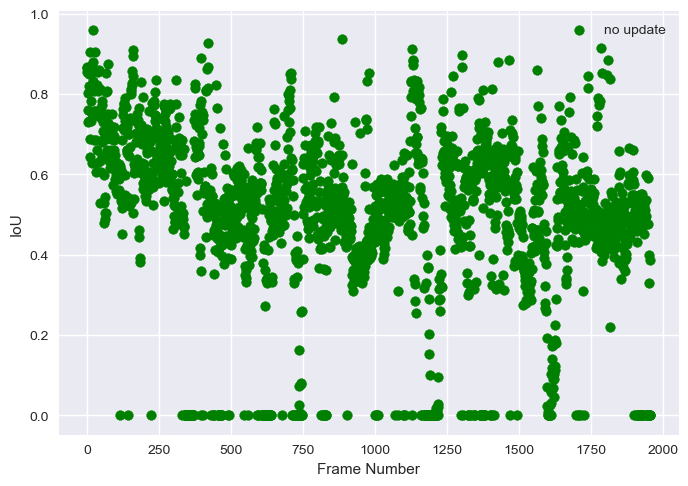

In [7]:
x=list(range(len(iou_list)))
plt.scatter(x,iou_list,color='g',label='no update')
#plt.plot(x,acc_ueff[0:15750],color='g',label='updated in each five frames')
plt.xlabel("Frame Number")
plt.ylabel("IoU")
plt.legend()
plt.show()

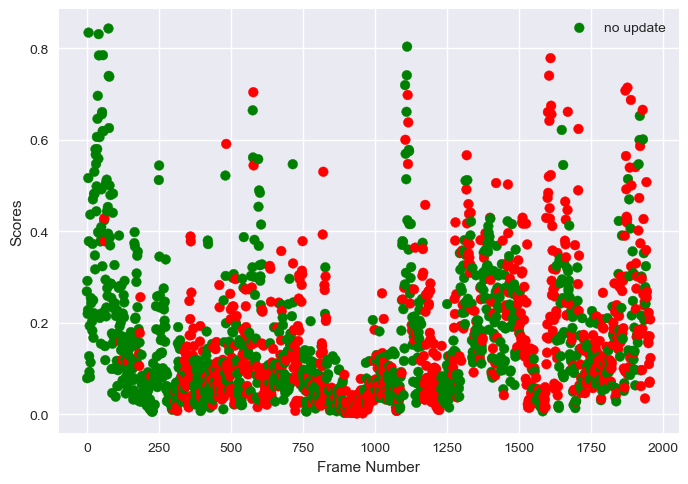

In [8]:
color = ['green' if x>=0.5 else 'red' for x in iou_list]
x=list(range(len(scores_wu)))
plt.scatter(x,scores_wu,color=color,label='no update')
#plt.plot(x,acc_ueff[0:15750],color='g',label='updated in each five frames')
plt.xlabel("Frame Number")
plt.ylabel("Scores")
plt.legend()
plt.show()

In [15]:
tp=0
fp=0
true_decisions=[]
false_decisions=[]
for score,iou in zip(scores_wu,iou_list):
    if iou>=0.5:
        true_decisions.append(score)
        tp+=1
    else:
        fp+=1
        false_decisions.append(score)
        
print(tp)
print(fp)

1120
838


In [10]:
from scipy.stats import norm
import statistics

In [11]:
len(true_decisions)

1539

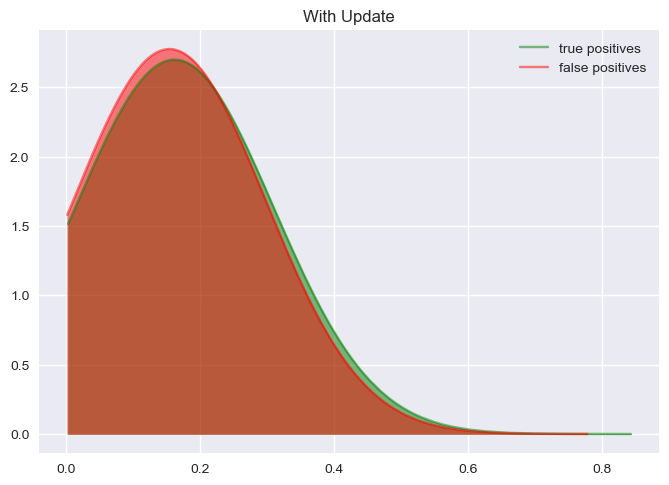

In [16]:
mean_tp = statistics.mean(true_decisions)
sd_tp = statistics.stdev(true_decisions)

mean_fp = statistics.mean(false_decisions)
sd_fp = statistics.stdev(false_decisions)

true_decisions.sort()
false_decisions.sort()
plt.plot(true_decisions, norm.pdf(true_decisions, mean_tp, sd_tp),color="green",alpha=0.5,label="true positives")
plt.fill_between(true_decisions,norm.pdf(true_decisions, mean_tp, sd_tp),color='green',alpha=0.5)
plt.plot(false_decisions, norm.pdf(false_decisions, mean_fp, sd_fp),color="red",alpha=0.5,label="false positives")
plt.fill_between(false_decisions,norm.pdf(false_decisions, mean_fp, sd_fp),color='red',alpha=0.5)
plt.title("With Update")
plt.legend()
plt.show()

In [13]:
true_ious=[]
false_ious=[]
for iou in iou_list:
    if iou>=0.5:
        true_ious.append(iou)
    else:
        false_ious.append(iou)

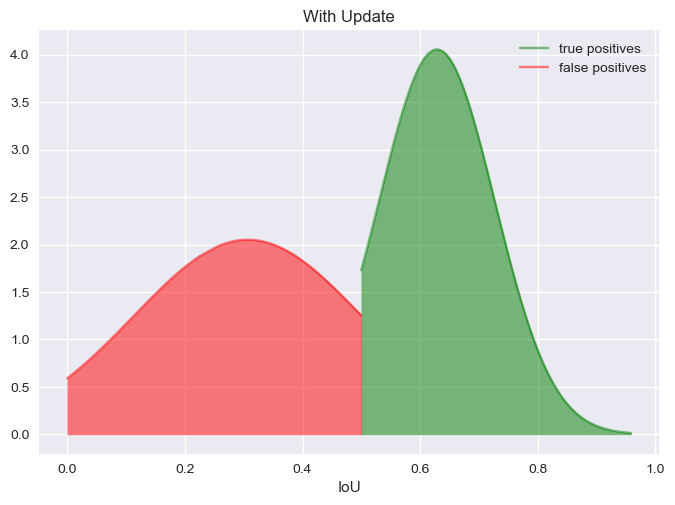

In [14]:
mean_tp = statistics.mean(true_ious)
sd_tp = statistics.stdev(true_ious)

mean_fp = statistics.mean(false_ious)
sd_fp = statistics.stdev(false_ious)

true_ious.sort()
false_ious.sort()
plt.plot(true_ious, norm.pdf(true_ious, mean_tp, sd_tp),color="green",alpha=0.5,label="true positives")
plt.fill_between(true_ious,norm.pdf(true_ious, mean_tp, sd_tp),color='green',alpha=0.5)
plt.plot(false_ious, norm.pdf(false_ious, mean_fp, sd_fp),color="red",alpha=0.5,label="false positives")
plt.fill_between(false_ious,norm.pdf(false_ious, mean_fp, sd_fp),color='red',alpha=0.5)
plt.xlabel("IoU")
plt.title("With Update")
plt.legend()
plt.show()